In [ ]:
from IPython.display import Image
Image(url= "https://assets.editorial.aetnd.com/uploads/2012/04/sinking-of-the-titanic-gettyimages-542907919-1.jpg")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv('titanic_data.csv')

In [ ]:
df.shape

(418, 12)

There are total of 12 columns and 418 rows in this dataset





In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


View Top 5 records

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


View bottom 5 records

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

df.drop('Cabin',axis=1, inplace=True)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Visualization

(array([ 46.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

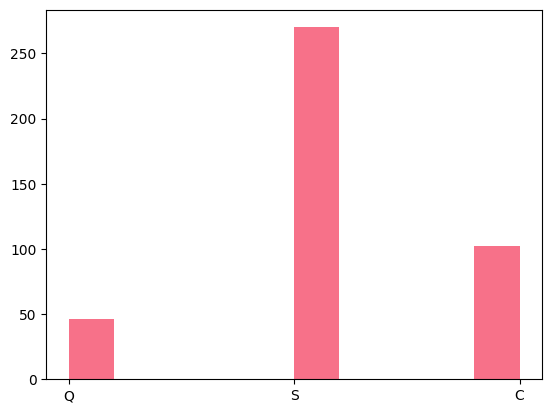

In [ ]:
plt.hist(df.Embarked)

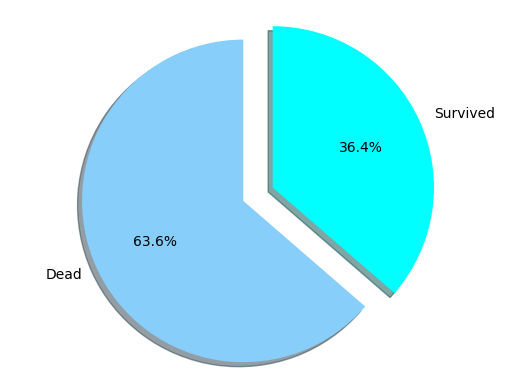

In [ ]:
count_Class = pd.value_counts(df.Sex, sort = True)

# Data to Plot
labels =  'Dead','Survived'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


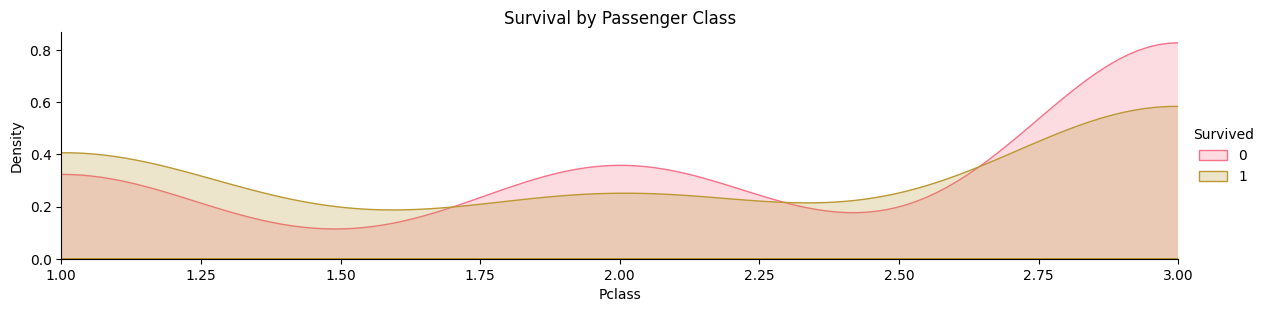

In [ ]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Pclass', shade=True)
facet.set(xlim=(1, 3))
facet.add_legend()
plt.title('Survival by Passenger Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


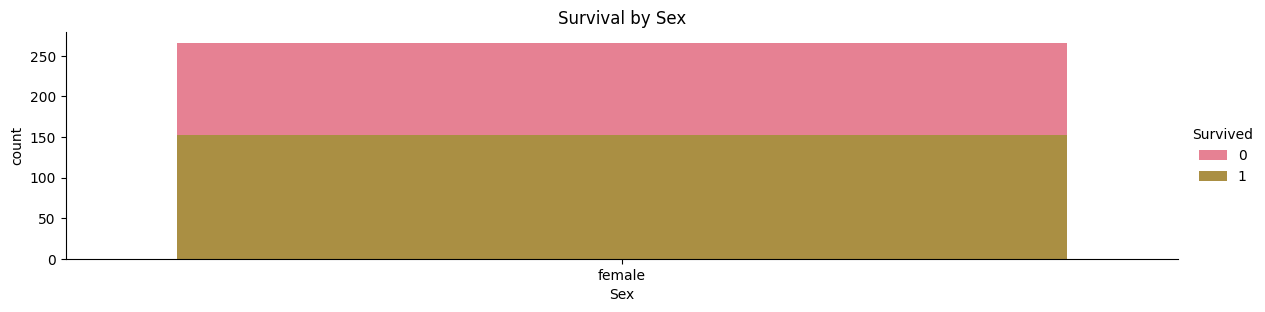

In [ ]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.countplot, 'Sex')
facet.add_legend()
plt.title('Survival by Sex')
plt.show()

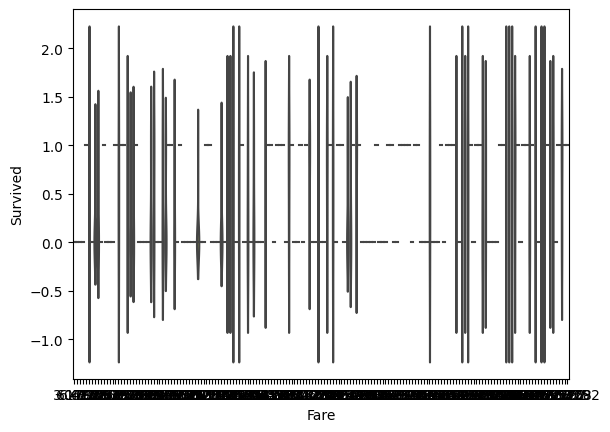

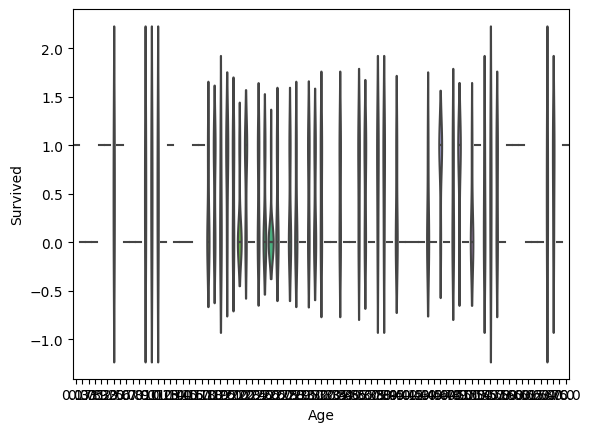

"g = sns.violinplot(y='Survived', x='PetalLengthCm', data=df, inner='quartile')\nplt.show()\ng = sns.violinplot(y='Survived', x='PetalWidthCm', data=df, inner='quartile')\nplt.show()"

In [ ]:
g = sns.violinplot(y='Survived', x='Fare', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Survived', x='Age', data=df, inner='quartile')
plt.show()

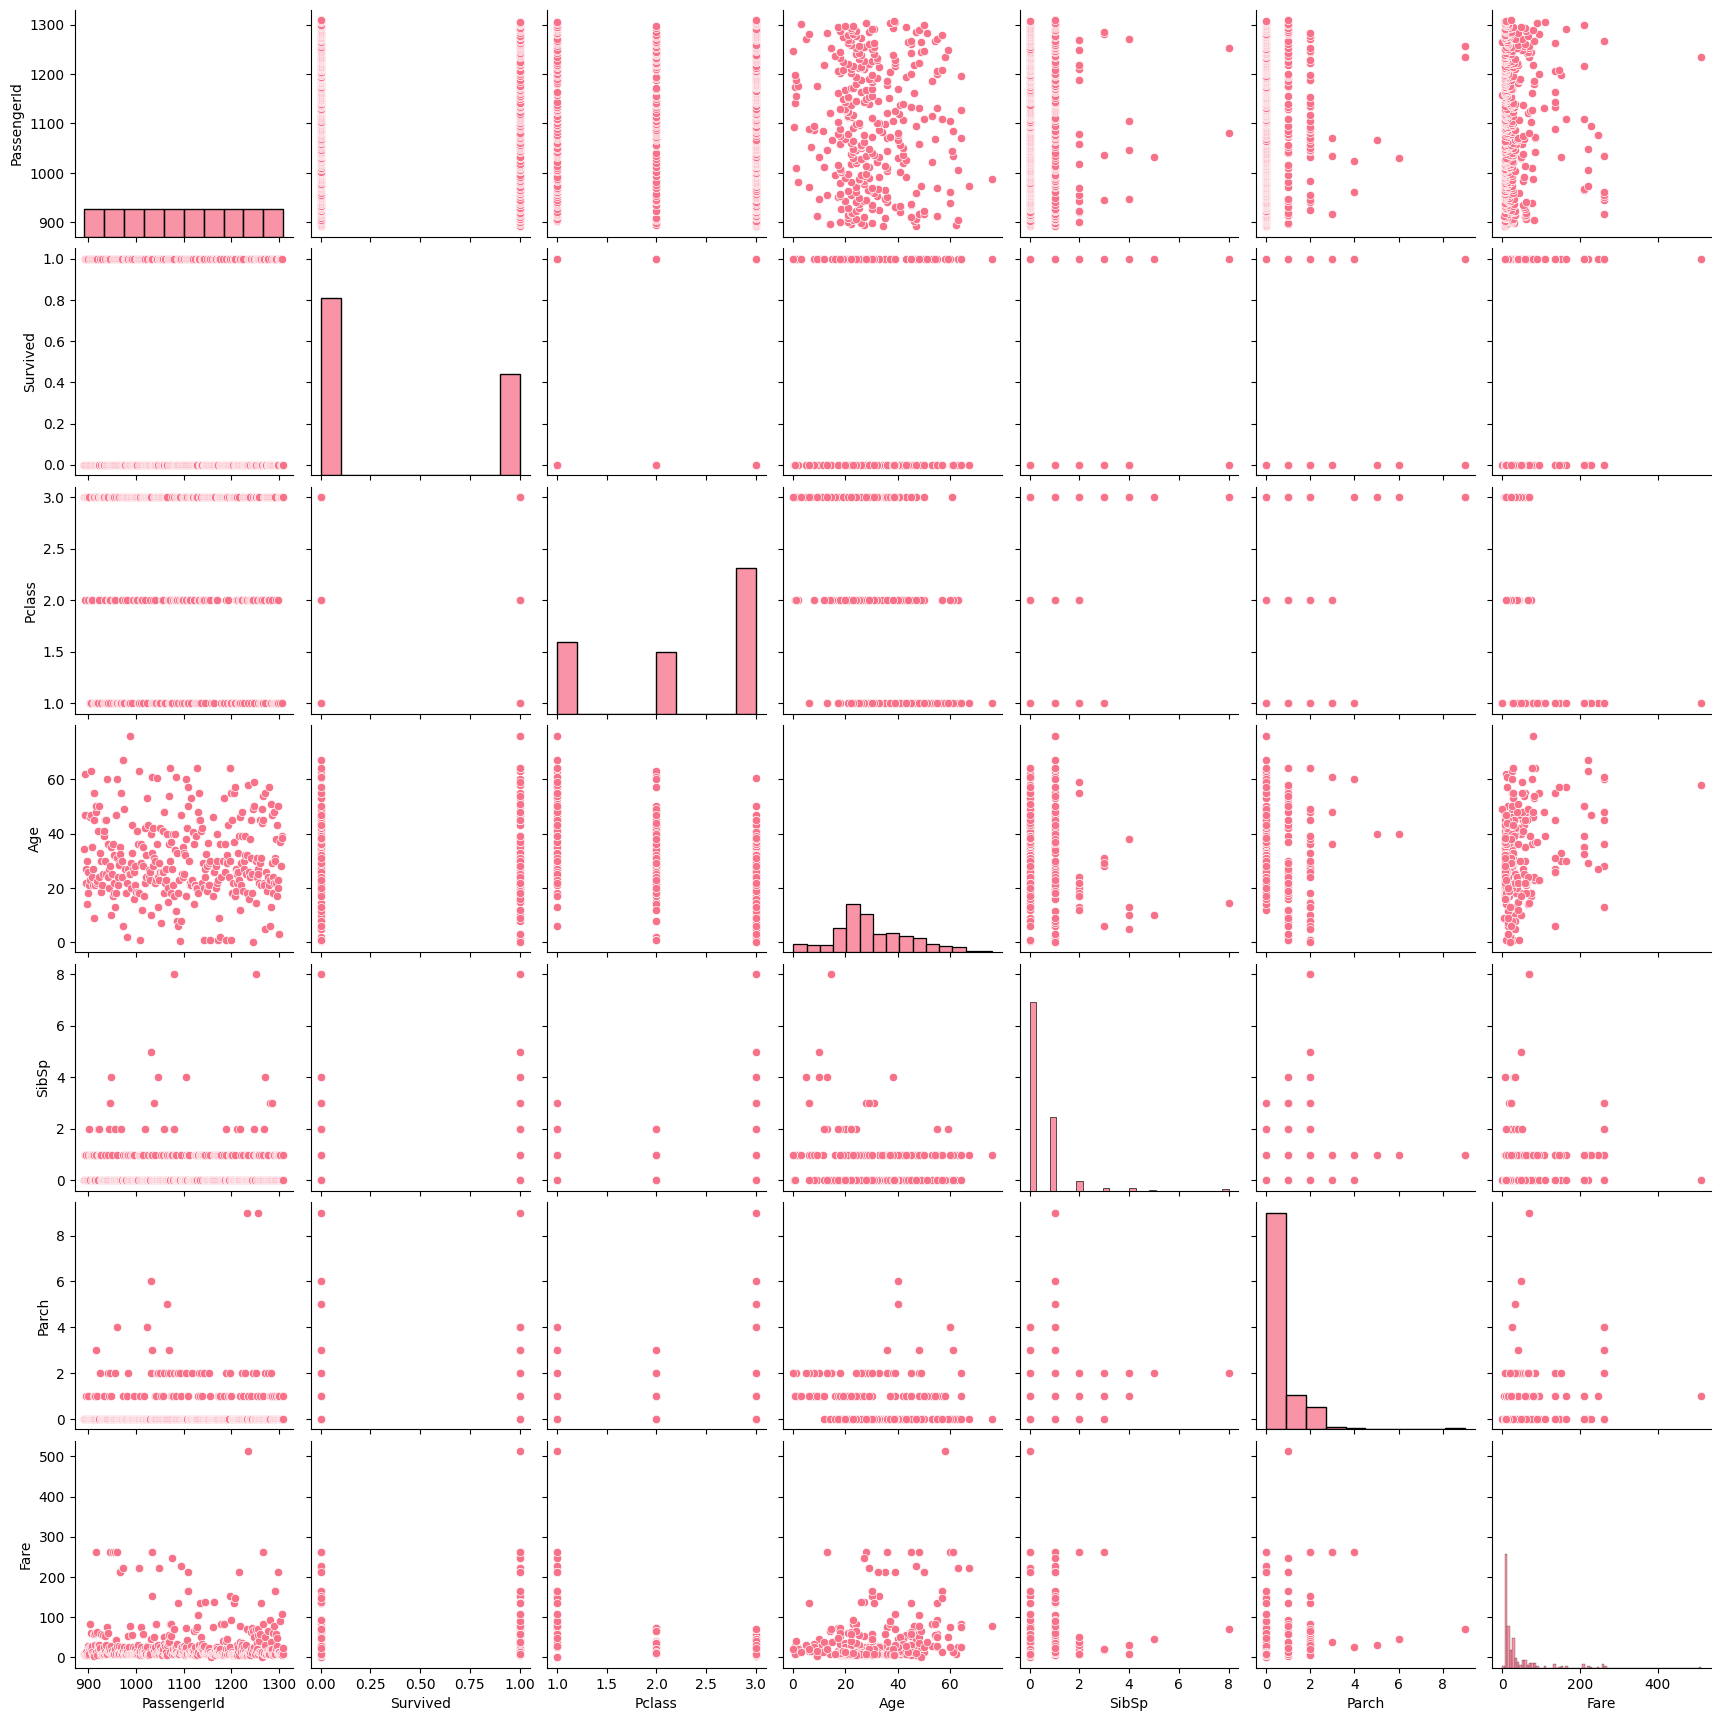

In [ ]:
sns.pairplot(df)

<ipython-input-613-0a32b195b83a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True )


<Axes: >

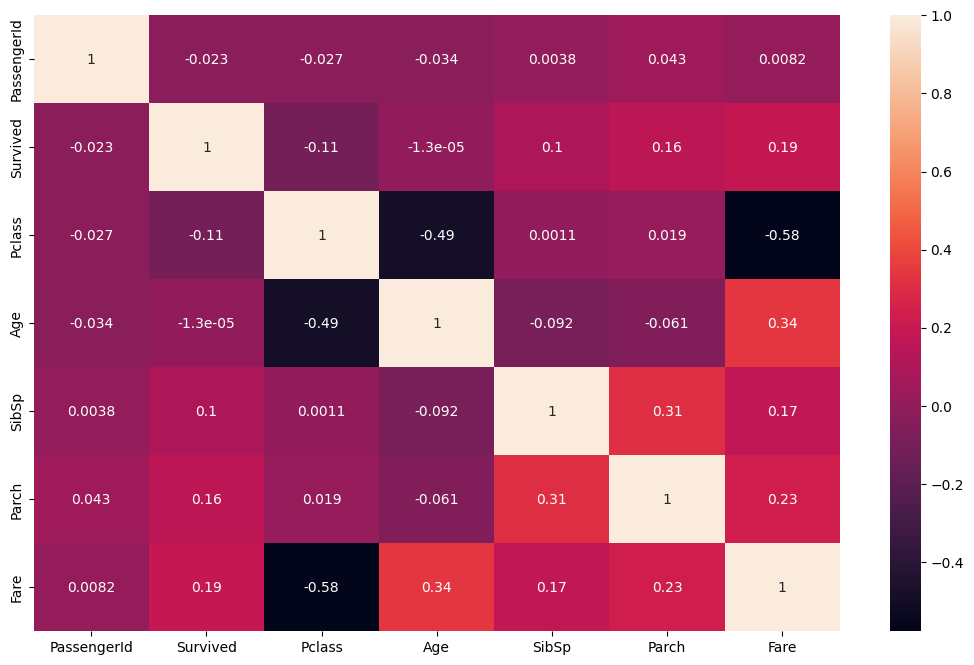

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True )

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

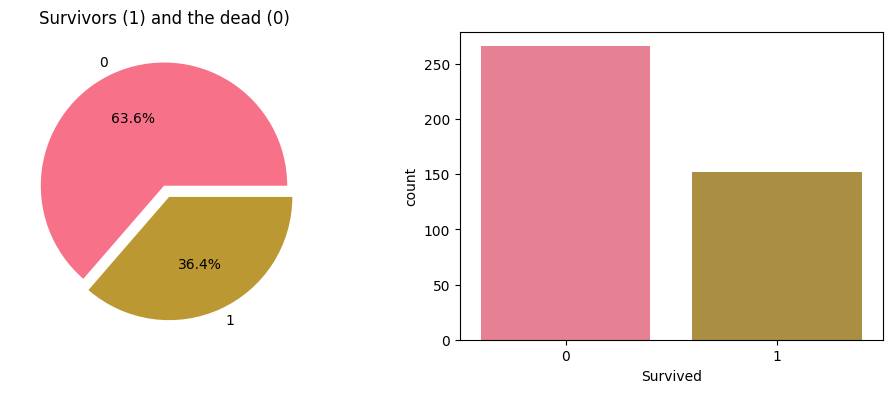

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x="Survived", data=df)



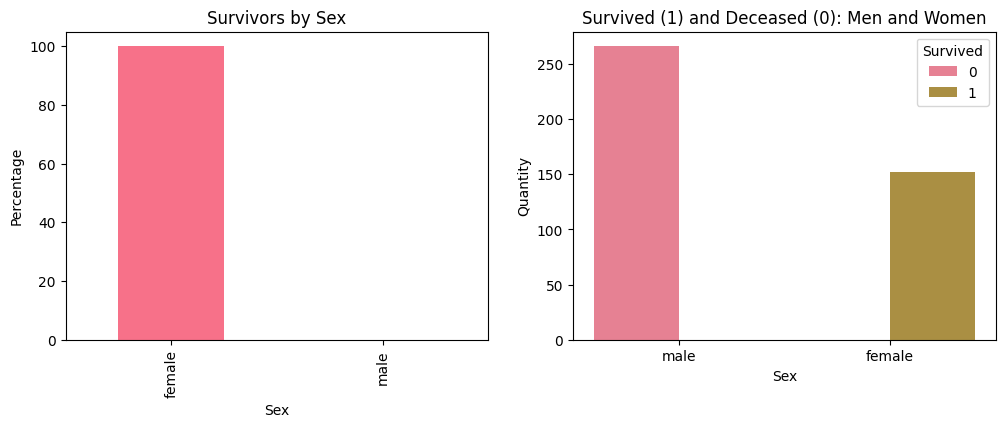

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
# Calculate the percentage of survivors by sex
survived_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# Plot a bar chart for survivors by sex
survived_by_sex.plot(kind='bar', ax=ax[0])
ax[0].set_title('Survivors by Sex')
ax[0].set_ylabel('Percentage')

# Plot a countplot for Survived by Sex
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and Deceased (0): Men and Women')

# Display the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


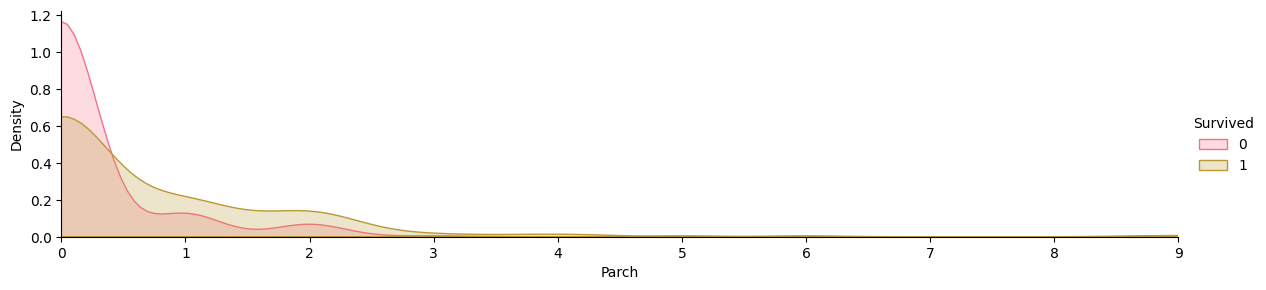

In [ ]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Parch', shade=True)
facet.set(xlim=(0, df['Parch'].max()))
facet.add_legend()
plt.show()

## Build Model


The Algorithms used below in this notebooks are:
  
Logistic Regression  
Random Forest     
K-Nearest Neighbor    
Support Vector Machine   
Decision Tree        



## 1. Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
selected_features = ['Pclass', 'Sex', 'SibSp', 'Parch','Age','Fare']
X = df[selected_features]
y = df['Survived']
X['Age'].fillna(x['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<ipython-input-618-e15acb0b6429>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(x['Age'].median(), inplace=True)
<ipython-input-618-e15acb0b6429>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].mean(), inplace=True)


In [ ]:
acc_log = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_log:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



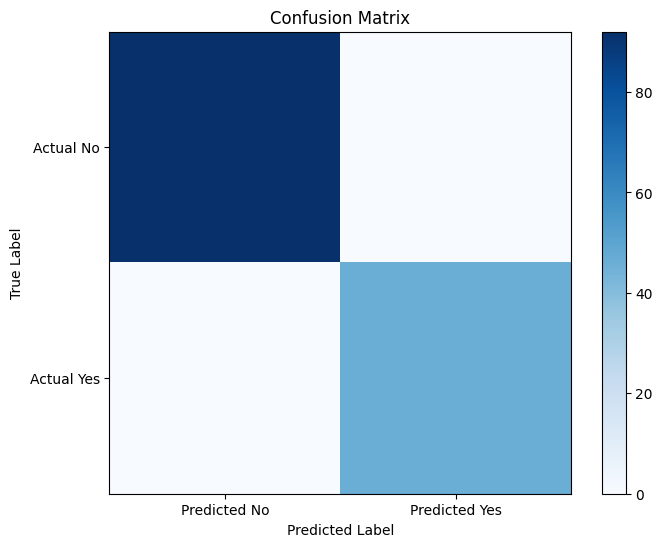

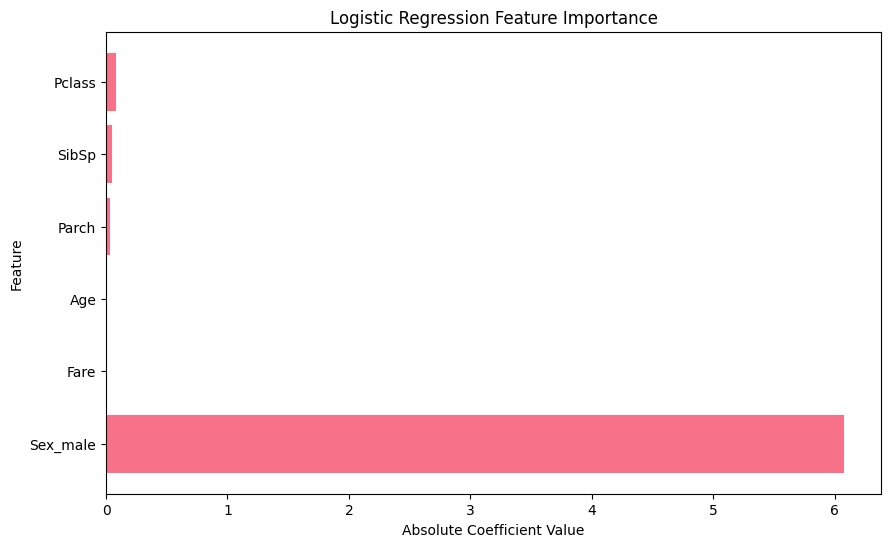

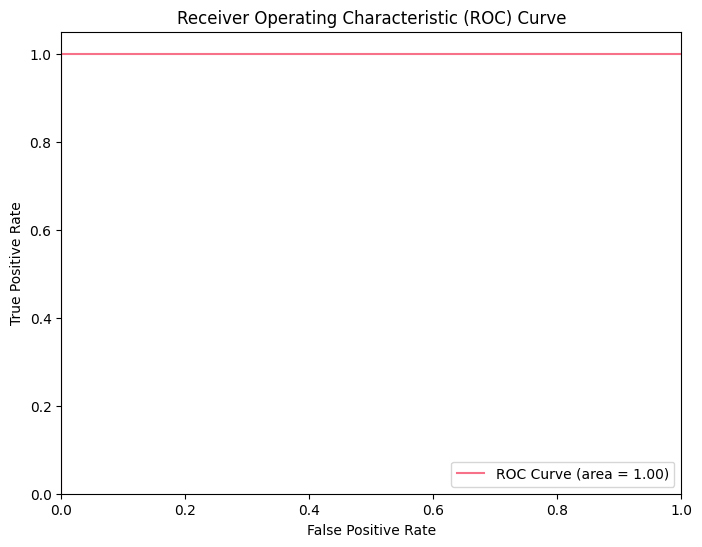

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

coef = model.coef_[0]
feature_names = X.columns
abs_coef = np.abs(coef)
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), abs_coef, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test , y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



## 2. Random Forest




In [ ]:
from sklearn.ensemble import RandomForestClassifier
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']
X = df[selected_features]
y = df['Survived']
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

<ipython-input-621-491591cb28c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-621-491591cb28c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].mean(), inplace=True)


In [ ]:
acc_rm= accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_rm:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



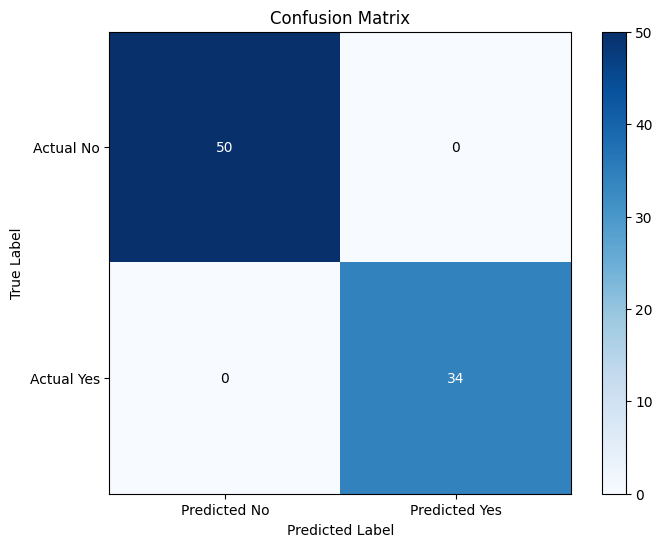

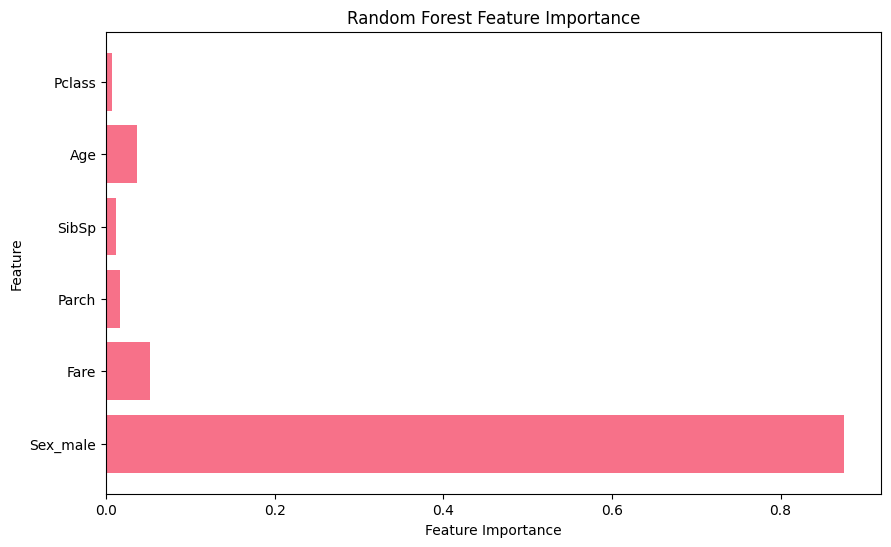

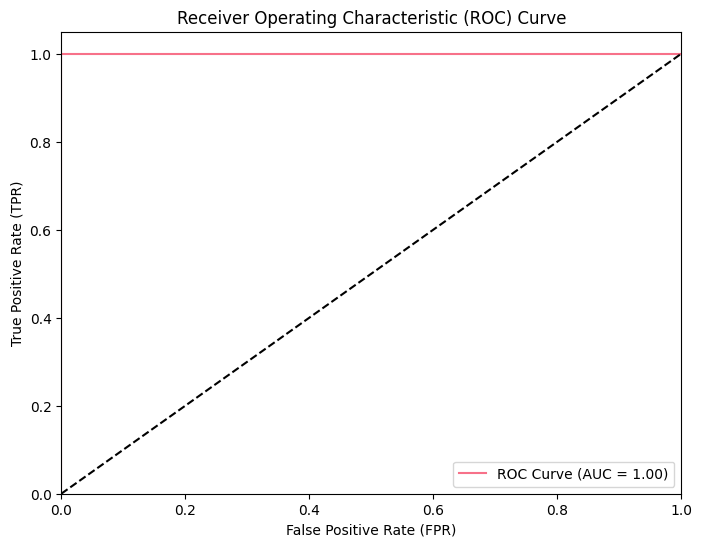

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align="center")
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[selected_features]
y = df['Survived']
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

<ipython-input-624-a708acea768c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-624-a708acea768c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].mean(), inplace=True)


In [ ]:
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_knn:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        50
           1       0.63      0.35      0.45        34

    accuracy                           0.65        84
   macro avg       0.65      0.61      0.60        84
weighted avg       0.65      0.65      0.63        84



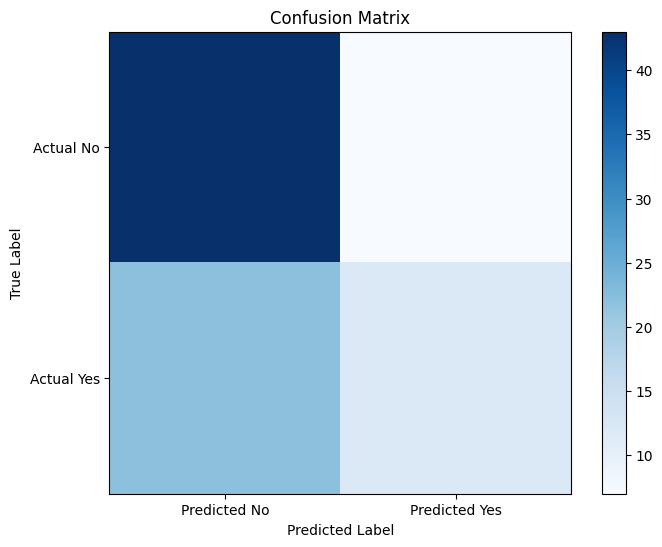

Baseline Accuracy: 0.68


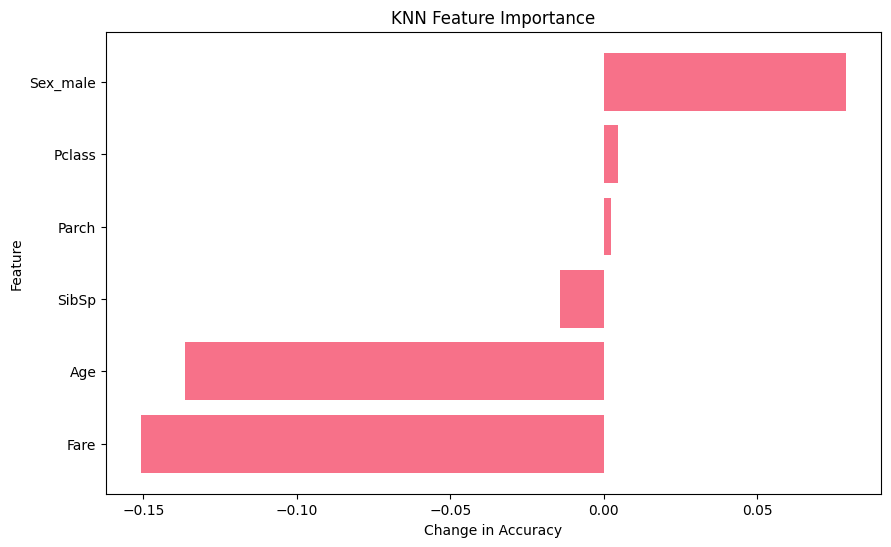

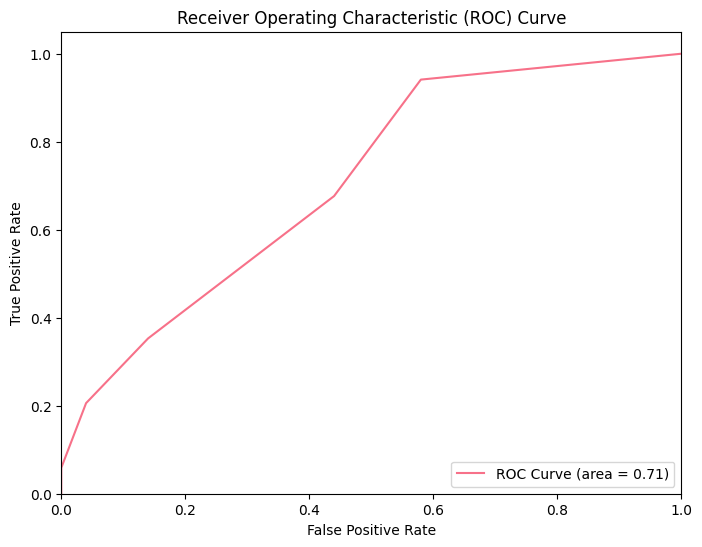

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.model_selection import cross_val_score
def cv_accuracy(X, y, model):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    return np.mean(scores)
baseline_accuracy = cv_accuracy(X, y, knn_model)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
feature_importance = {}
# Calculate feature importance by iteratively excluding each feature
feature_importance = {}
for feature in X.columns:
    X_subset = X.drop(columns=[feature])
    accuracy_without_feature = cv_accuracy(X_subset, y, knn_model)  # Use cv_accuracy function
    importance = baseline_accuracy - accuracy_without_feature
    feature_importance[feature] = importance

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
feature_names, importance_values = zip(*sorted_importance)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Change in Accuracy')
plt.ylabel('Feature')
plt.title('KNN Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



## 4. Support Vector Machines

In [ ]:
from sklearn.svm import SVC
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[selected_features]
y = df['Survived']
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

<ipython-input-627-173af216926b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-627-173af216926b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].mean(), inplace=True)


In [ ]:
acc_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_svm:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



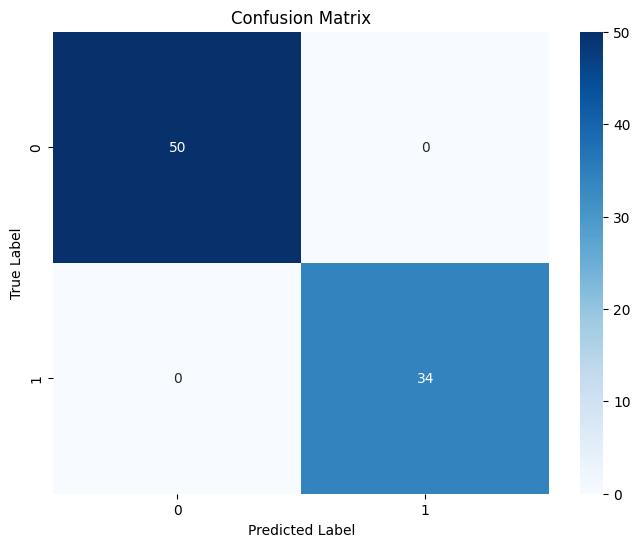

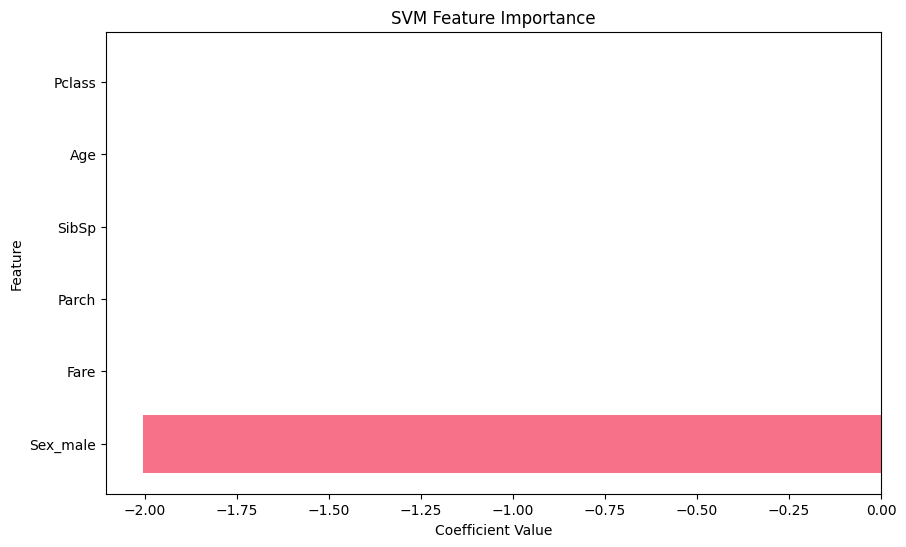

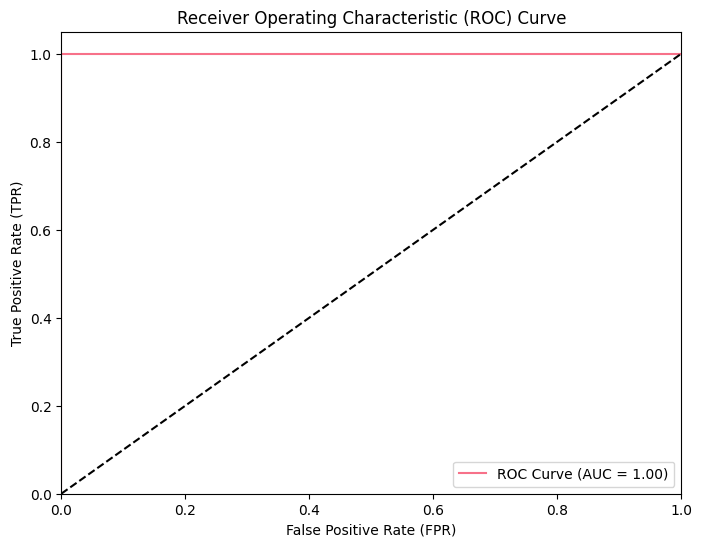

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

feature_names = X.columns
coefficients = svm_model.coef_.flatten()
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), coefficients, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SVM Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[selected_features]
y = df['Survived']
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

<ipython-input-630-646ee96280f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-630-646ee96280f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].mean(), inplace=True)


In [ ]:
acc_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_dt:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



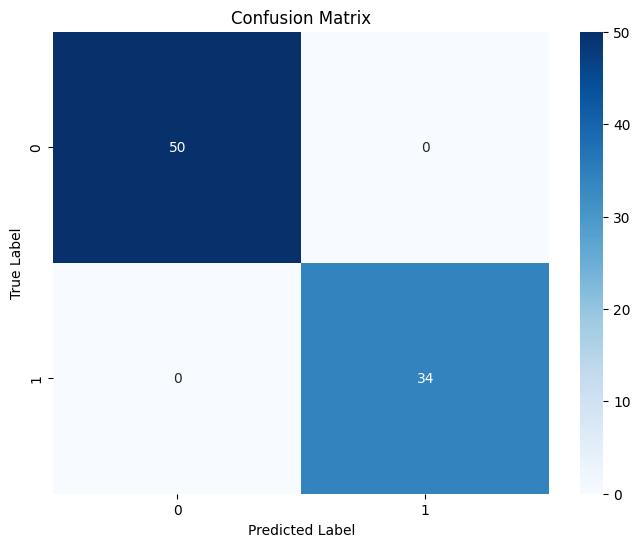

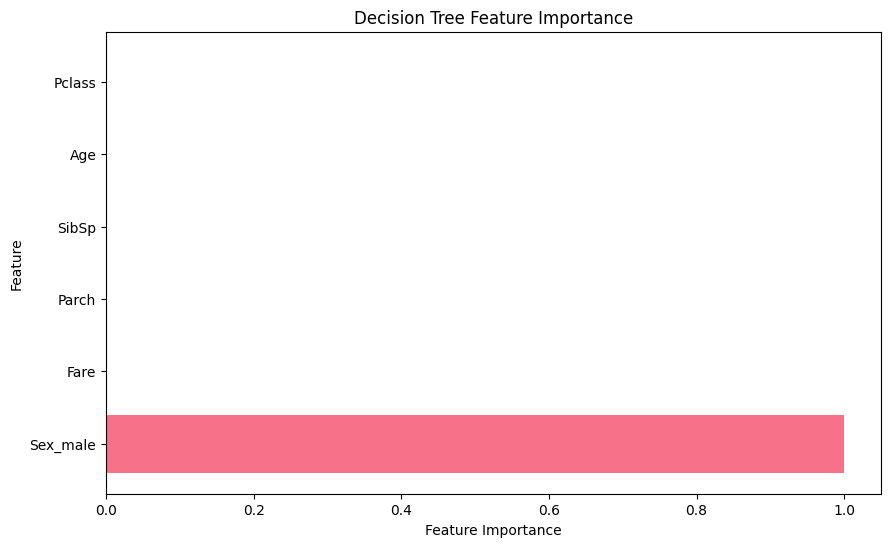

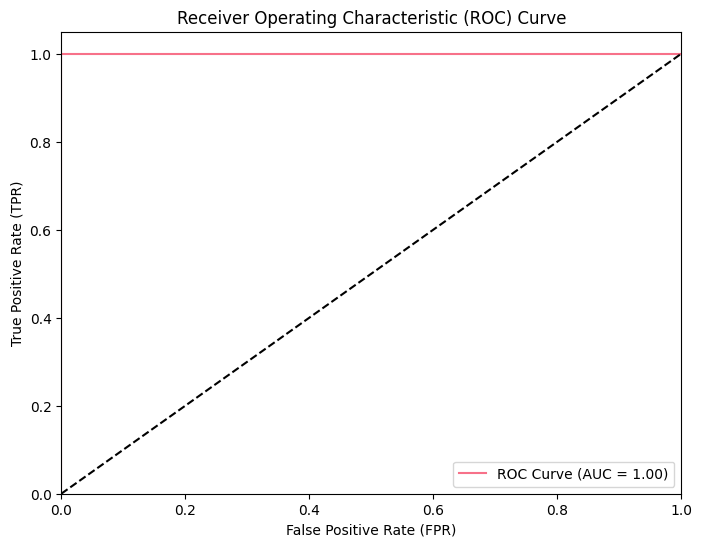

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

importances = decision_tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align="center")
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ACCURACY

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours','Random Forest'],
    'Score': [acc_log, acc_dt, acc_svm, acc_knn,acc_rm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,1.000000
1,Decision Tree,1.000000
2,Support Vector Machines,1.000000
4,Random Forest,1.000000
3,K-Nearest Neighbours,0.654762


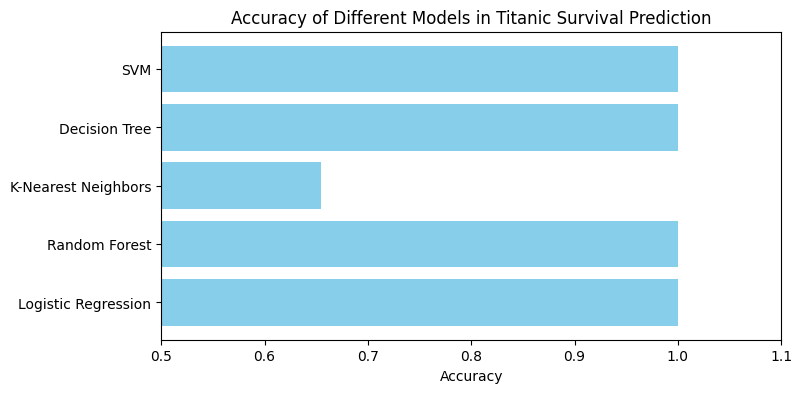

In [ ]:
import matplotlib.pyplot as plt

# Define the names of the models and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'SVM']
accuracies = [acc_log,acc_rm,acc_knn,acc_dt,acc_svm]

# Create a bar plot for model accuracies
plt.figure(figsize=(8, 4))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models in Titanic Survival Prediction')
plt.xlim(0.5, 1.1)  # Adjust the x-axis limits if needed
#plt.gca().invert_yaxis()  # Reverse the order of models
plt.show()


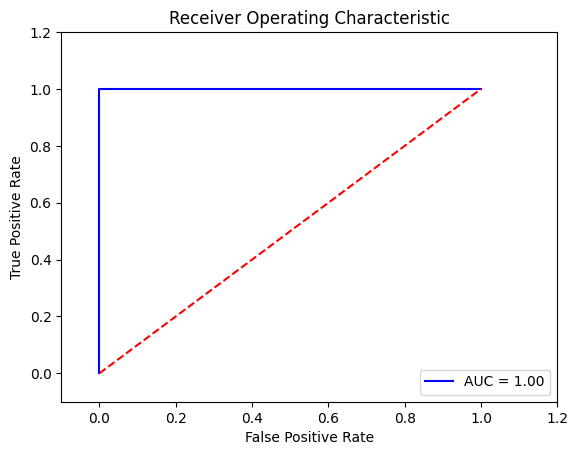

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()